In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pickle

<hr>

Load df_dummies.csv

In [2]:
folder = os.path.join("..", "data")
filename = "df_dummies.csv"
filepath = os.path.join(folder, filename)

df = pd.read_csv(filepath)
df

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,...,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_weekday_Monday,arrival_date_weekday_Saturday,arrival_date_weekday_Sunday,arrival_date_weekday_Thursday,arrival_date_weekday_Tuesday,arrival_date_weekday_Wednesday
0,0,342,0,0,2,0.0,0,0,3,0,...,0,0,1,0,0,0,0,0,0,1
1,0,737,0,0,2,0.0,0,0,4,0,...,0,0,1,0,0,0,0,0,0,1
2,0,7,0,1,1,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,13,0,1,1,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,14,0,2,2,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119381,0,23,2,5,2,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
119382,0,102,2,5,3,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
119383,0,34,2,5,2,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
119384,0,109,2,5,2,0.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


<hr>

Split df into train, val, test

In [3]:
df_train, df_test = train_test_split(df, stratify=df["is_canceled"], random_state=400, test_size=0.2)
df_train, df_val = train_test_split(df_train, stratify=df_train["is_canceled"], random_state=400, test_size=0.2)

In [4]:
print(f"df_train shape: {df_train.shape}")
print(f"df_val shape: {df_val.shape}")
print(f"df_test shape: {df_test.shape}")

df_train shape: (76406, 71)
df_val shape: (19102, 71)
df_test shape: (23878, 71)


<hr>

Save df_train.csv, df_val.csv, df_test.csv

In [5]:
train_filepath = os.path.join(folder, "df_train.csv")
df_train.to_csv(train_filepath, index=False)

val_filepath = os.path.join(folder, "df_val.csv")
df_val.to_csv(val_filepath, index=False)

test_filepath = os.path.join(folder, "df_test.csv")
df_test.to_csv(test_filepath, index=False)

<hr>

Plot histogram for each feature of train data, to check how the distributions are organized.

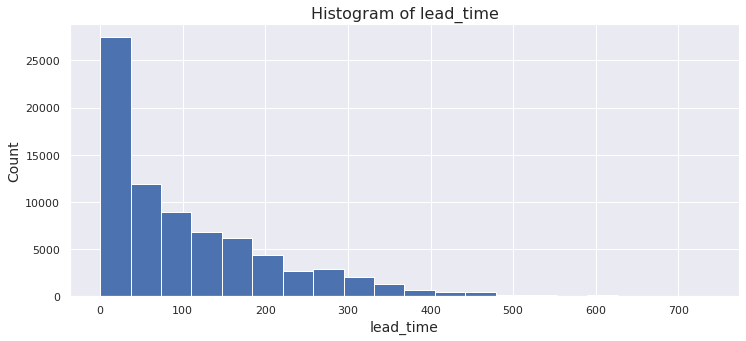

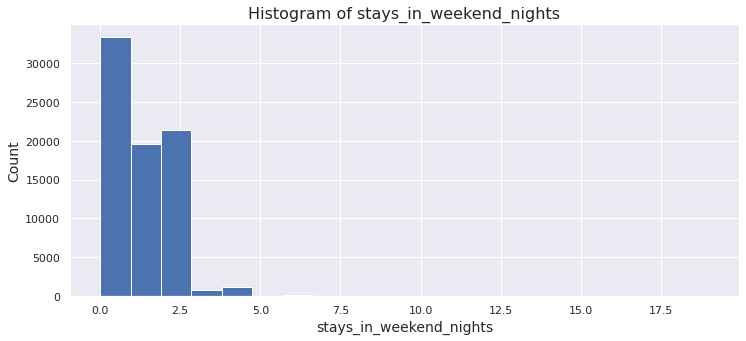

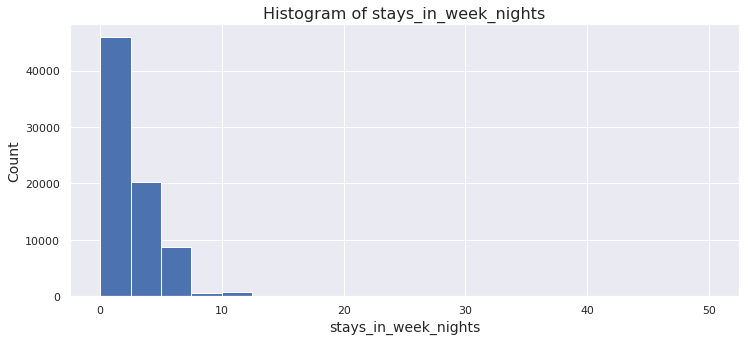

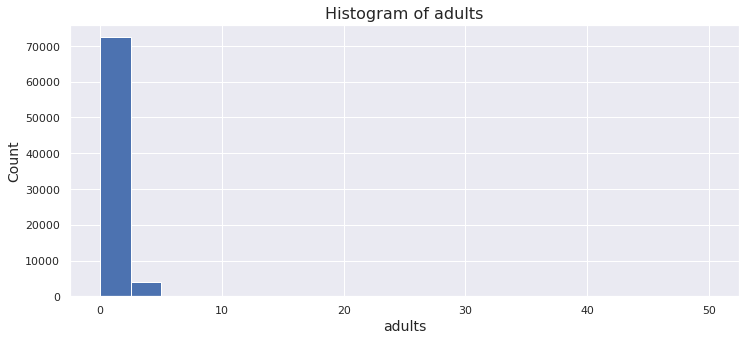

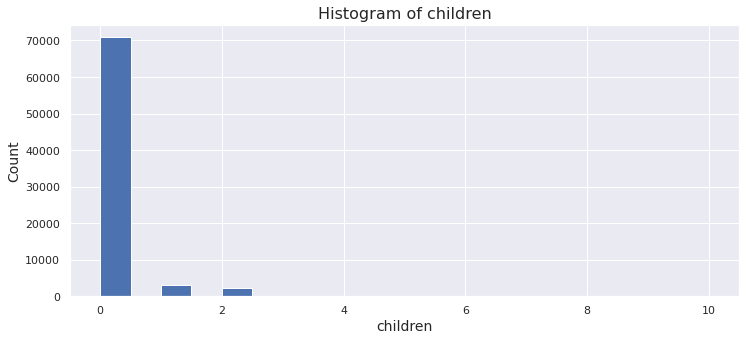

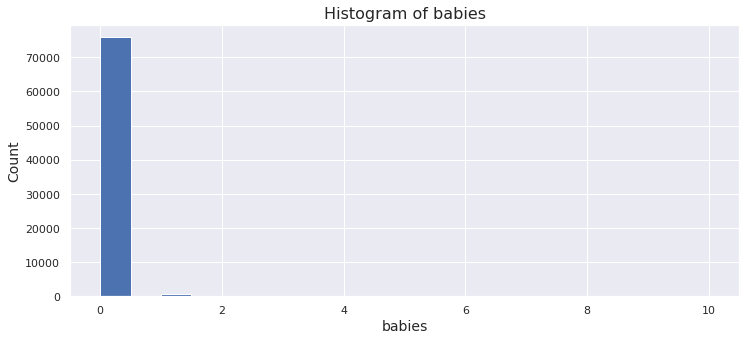

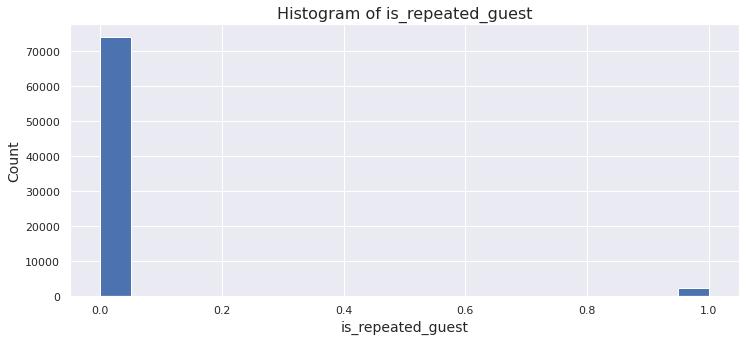

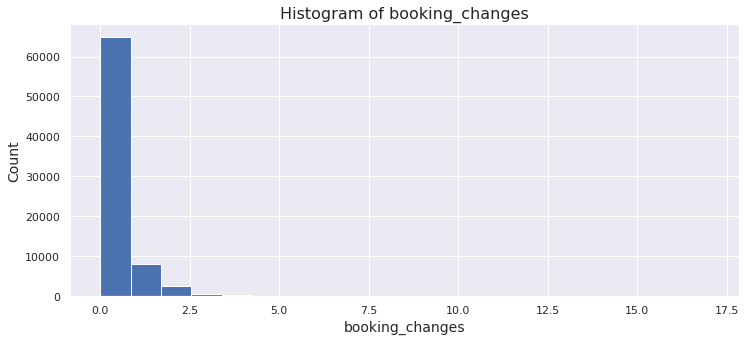

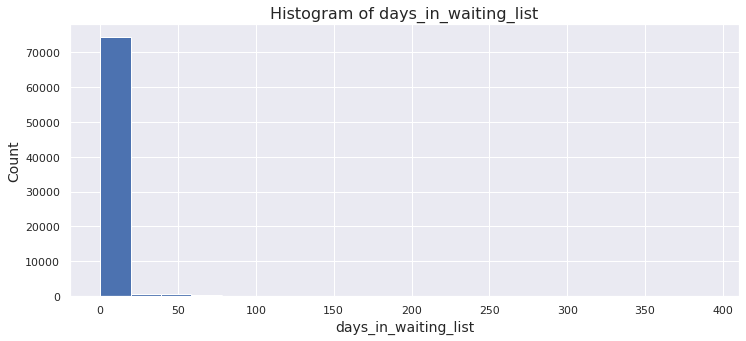

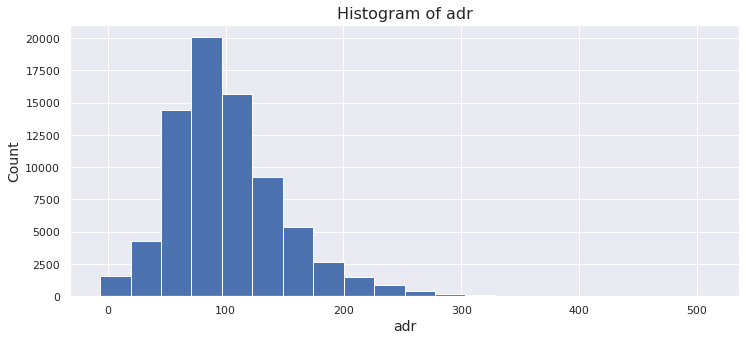

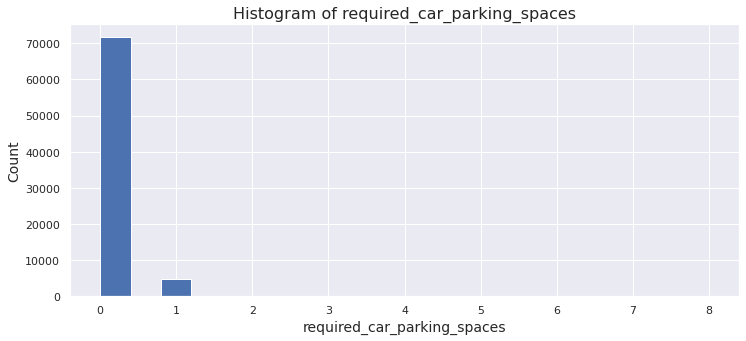

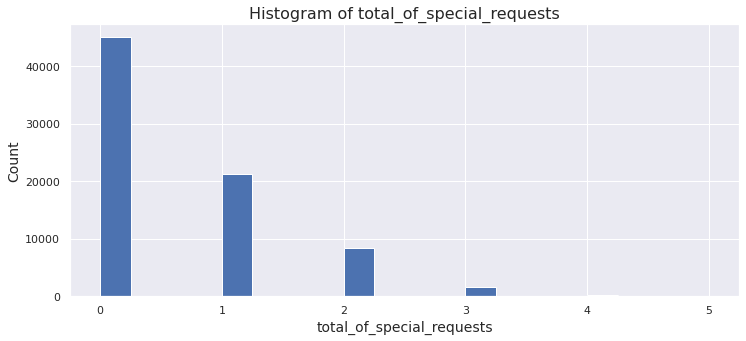

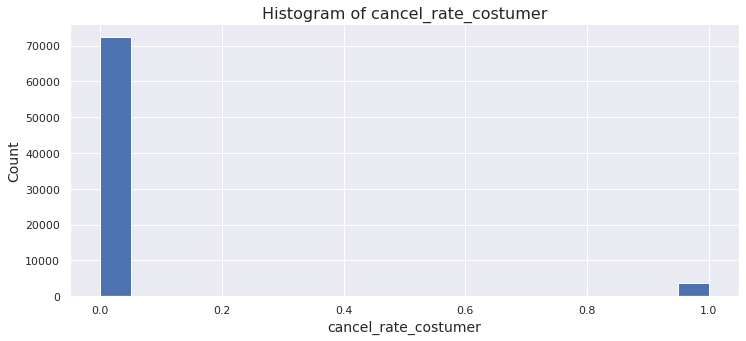

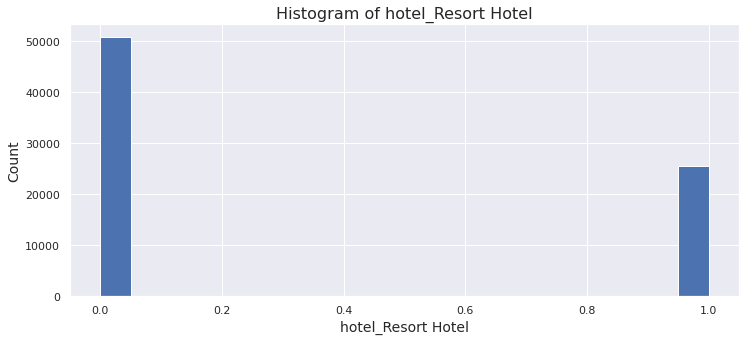

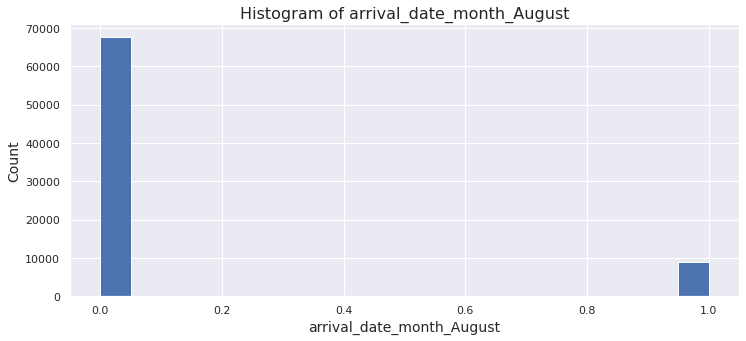

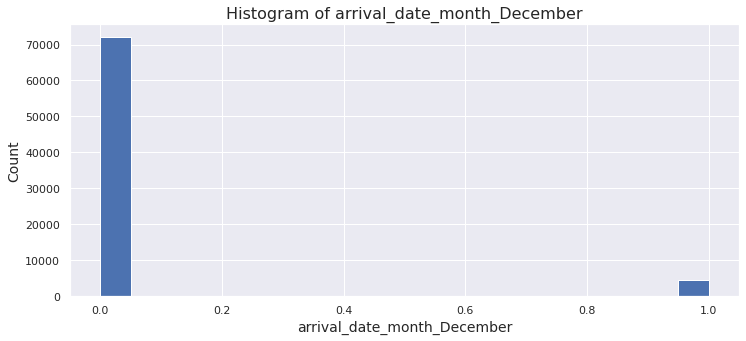

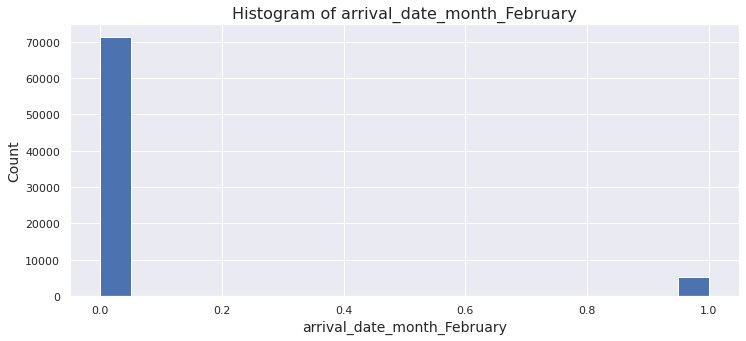

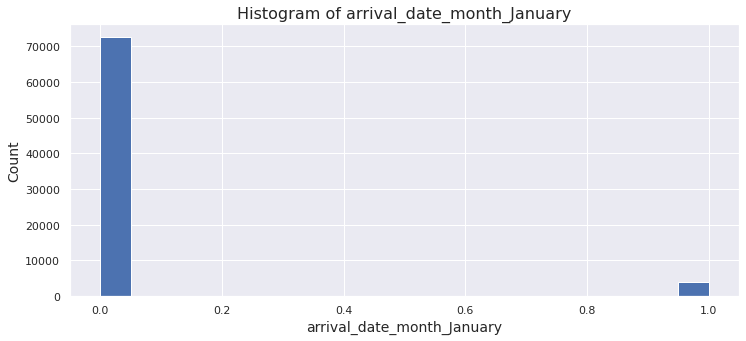

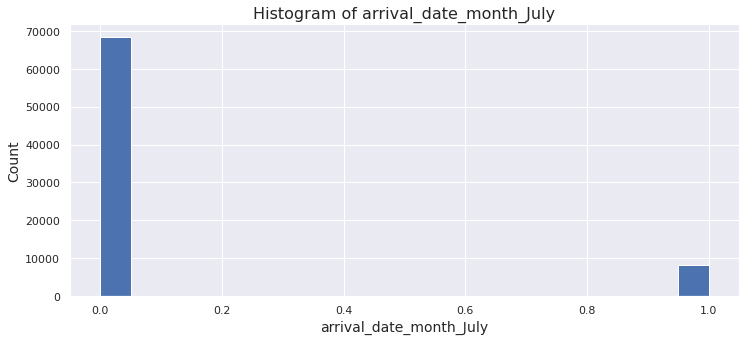

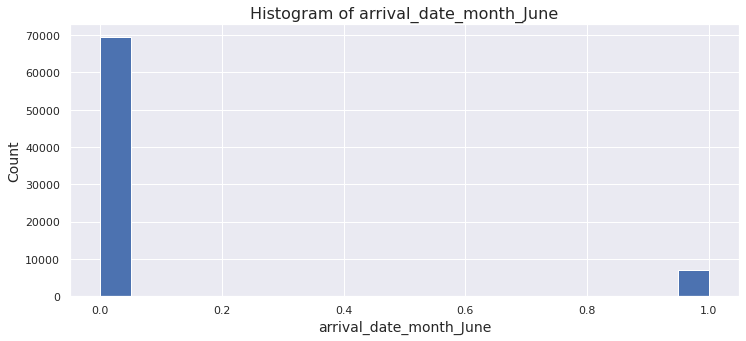

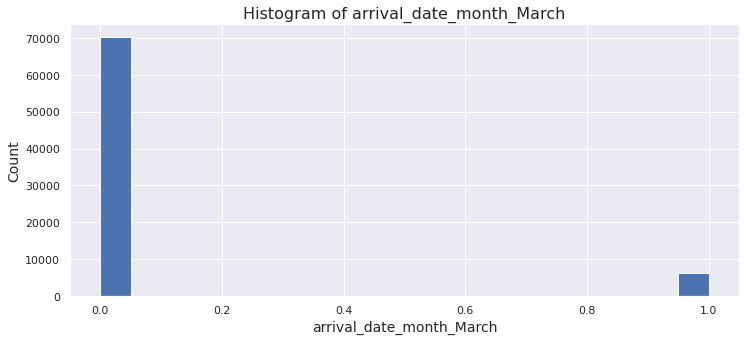

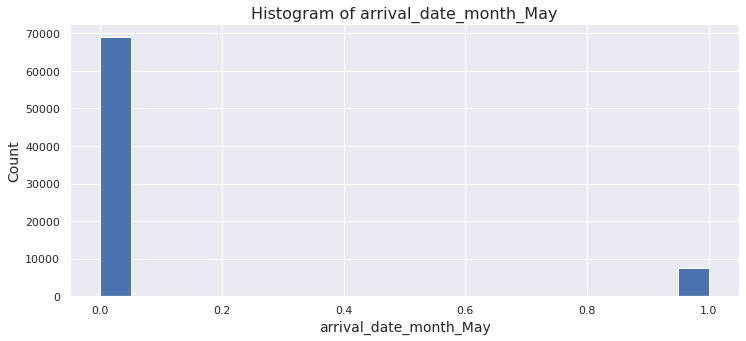

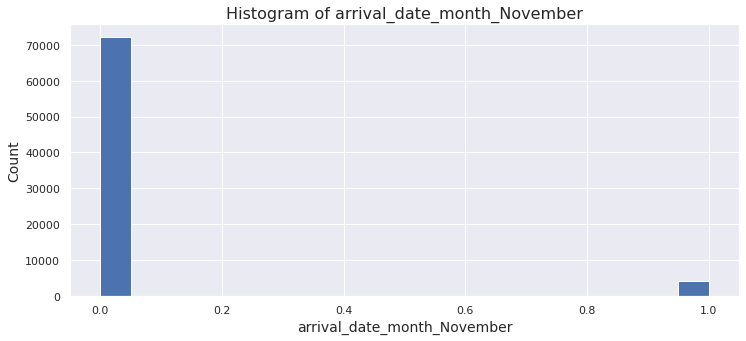

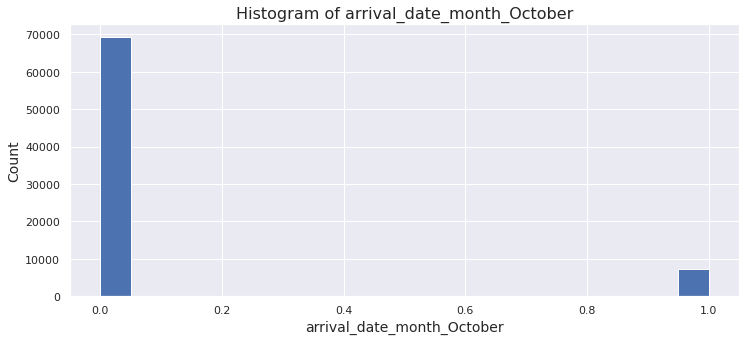

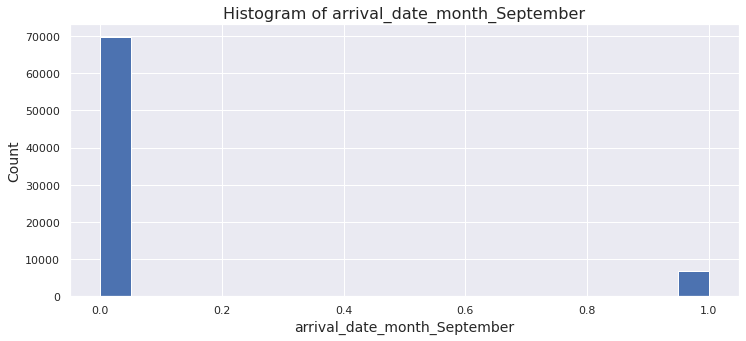

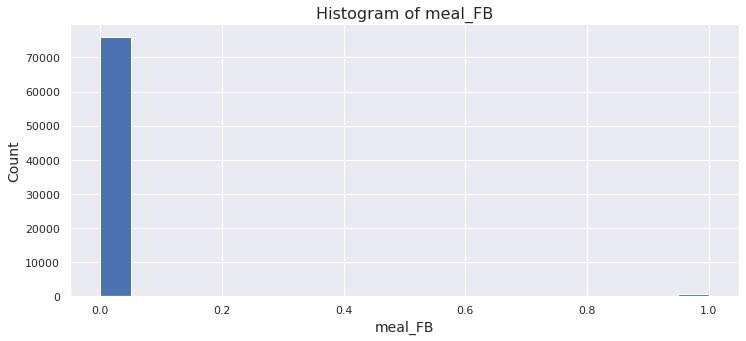

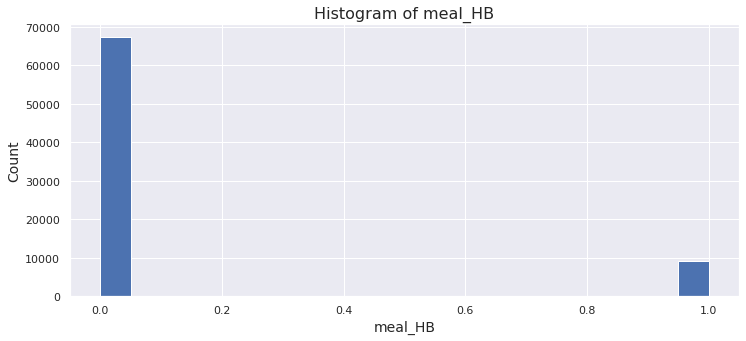

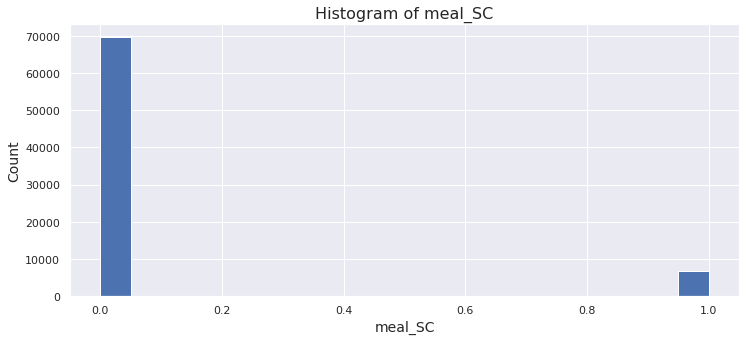

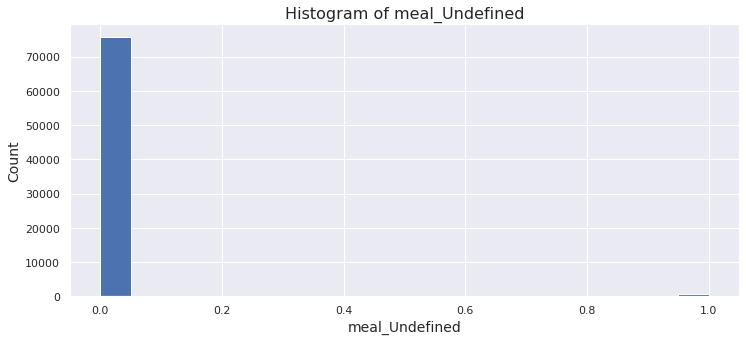

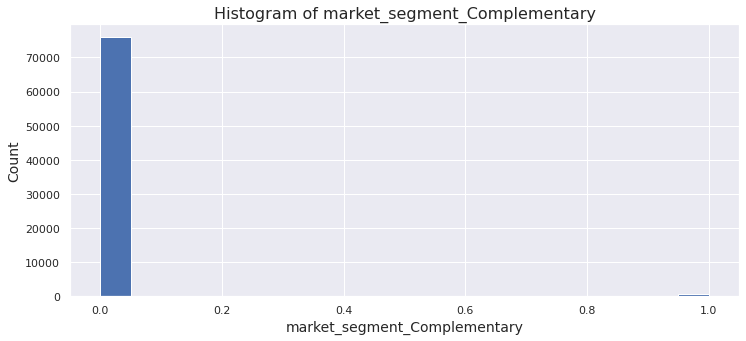

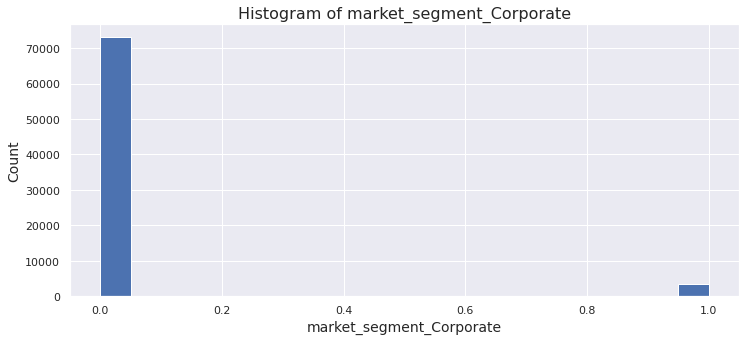

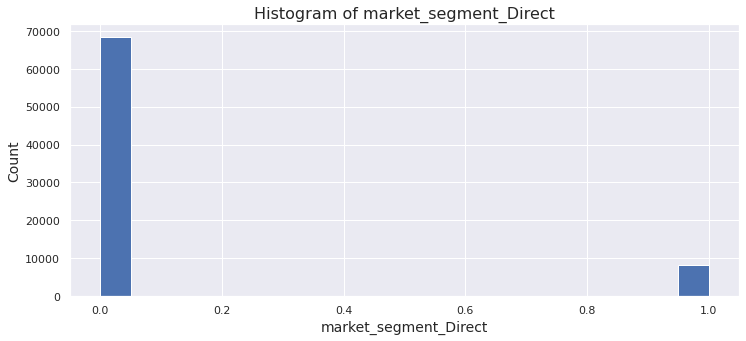

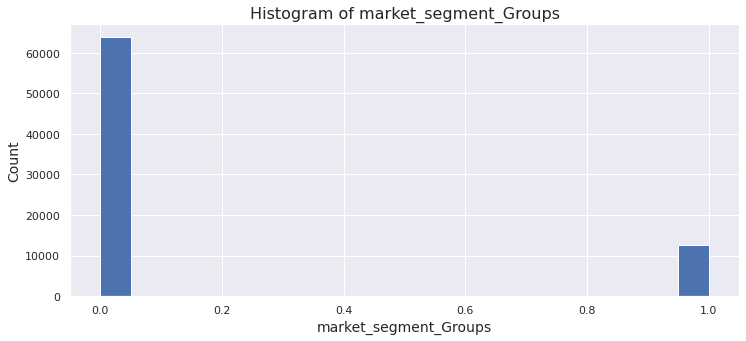

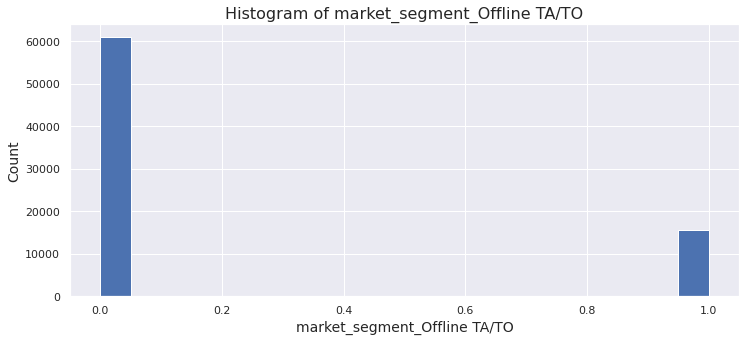

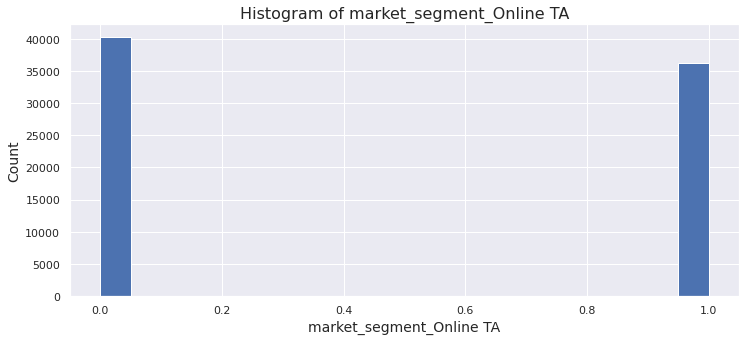

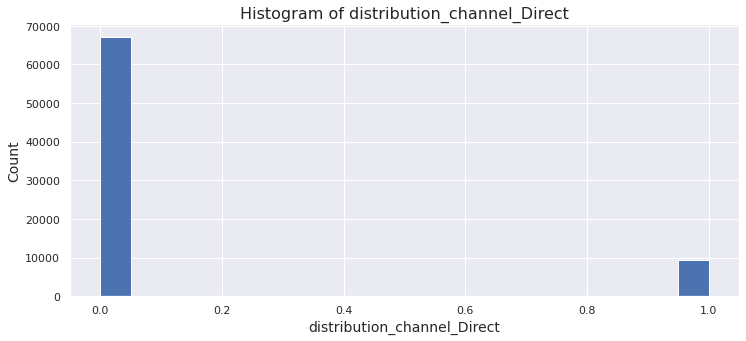

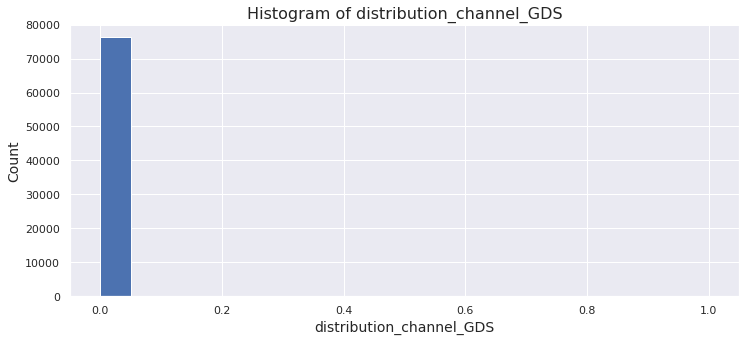

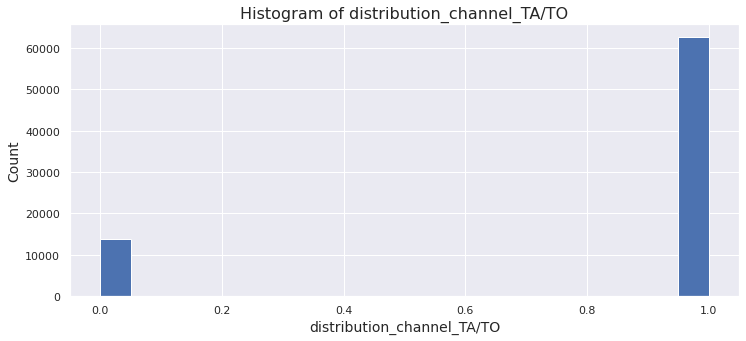

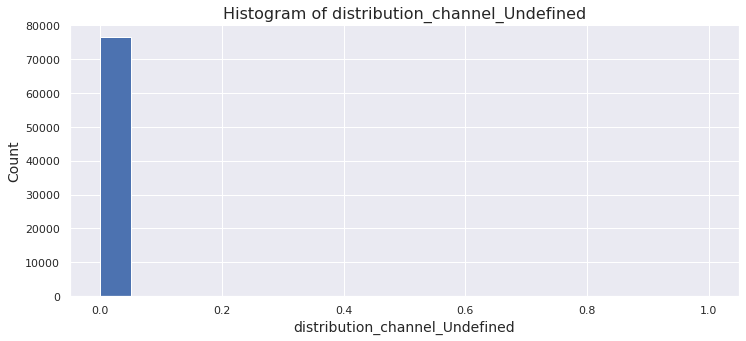

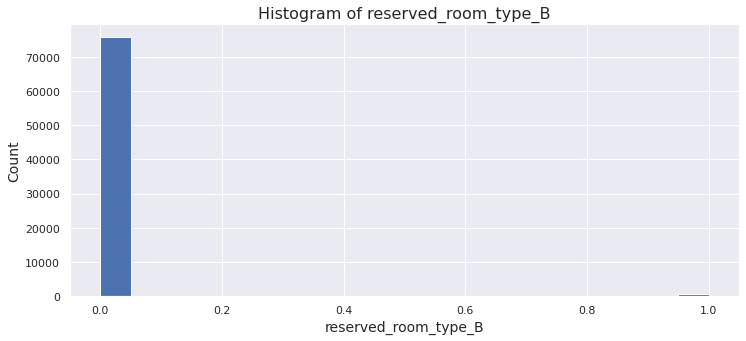

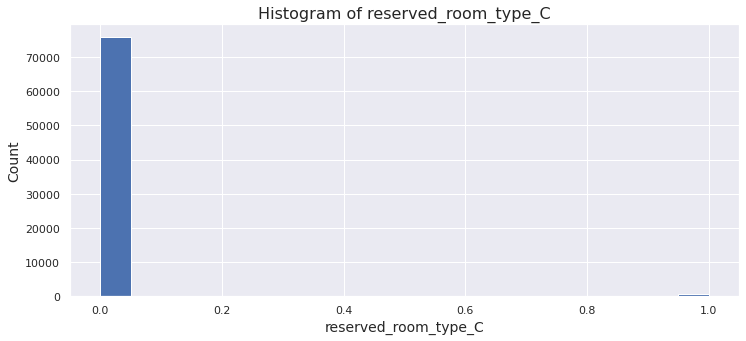

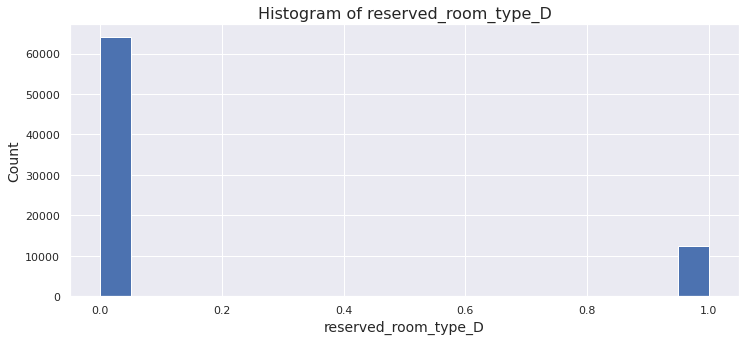

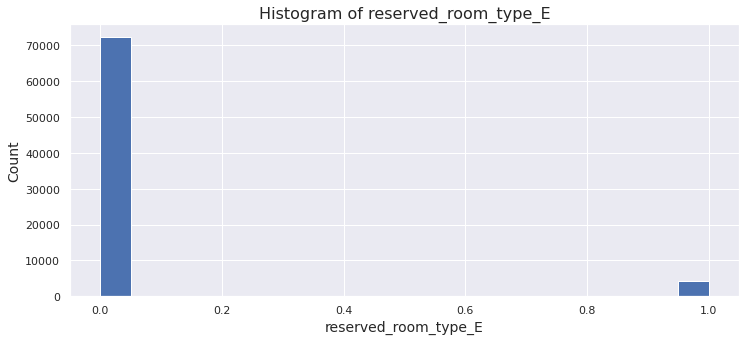

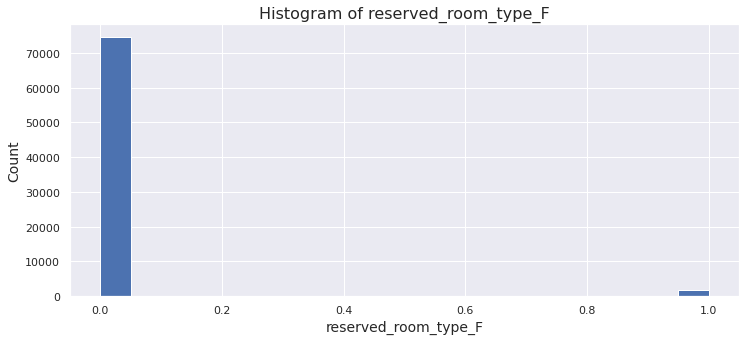

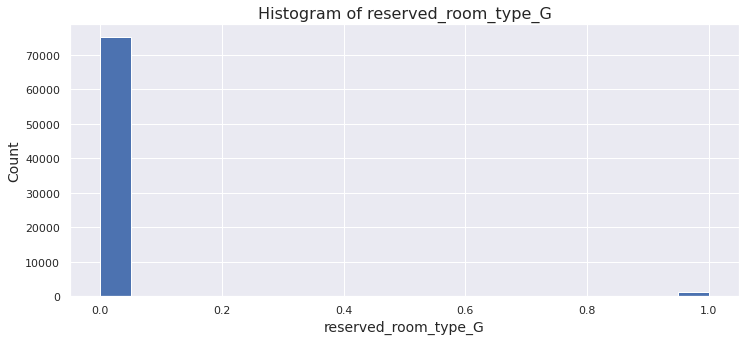

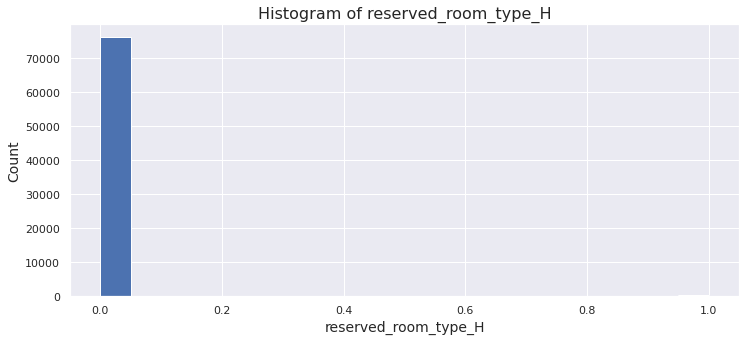

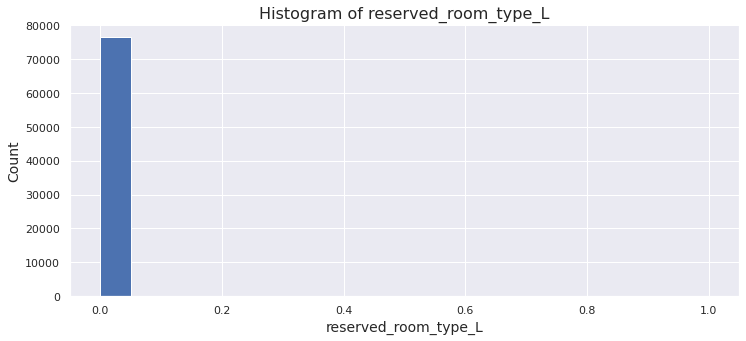

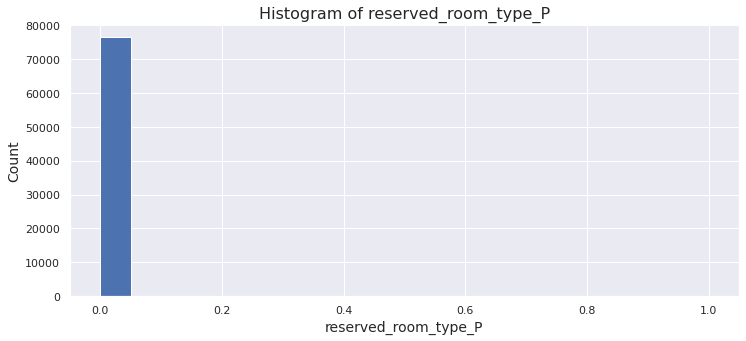

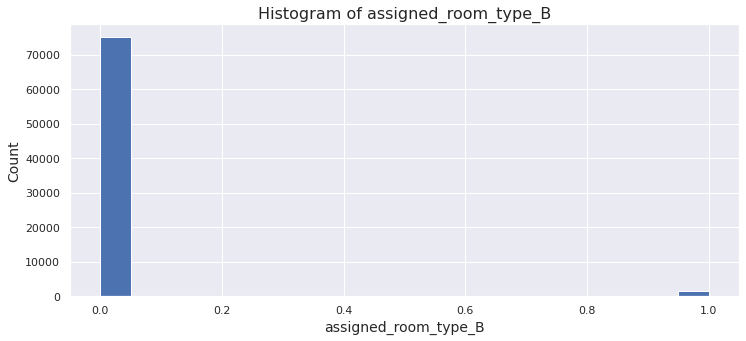

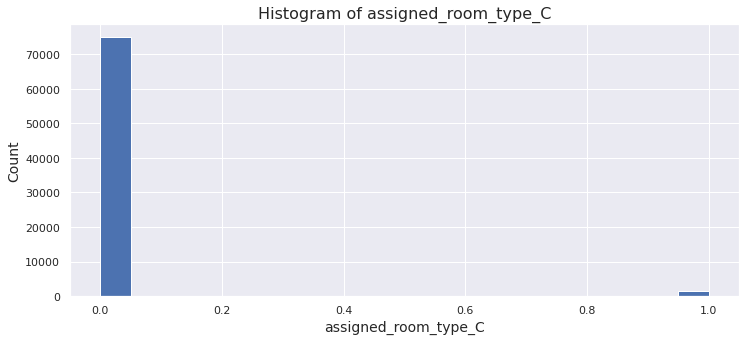

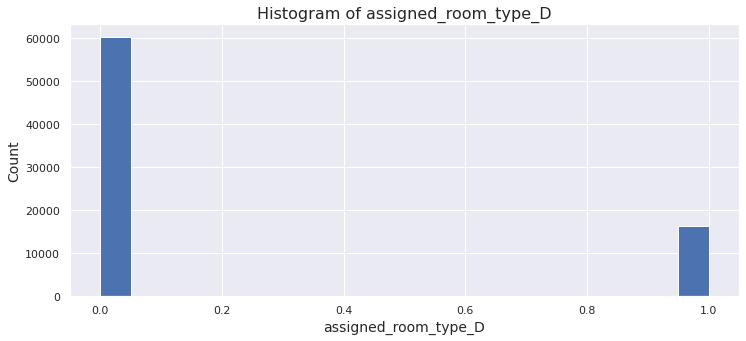

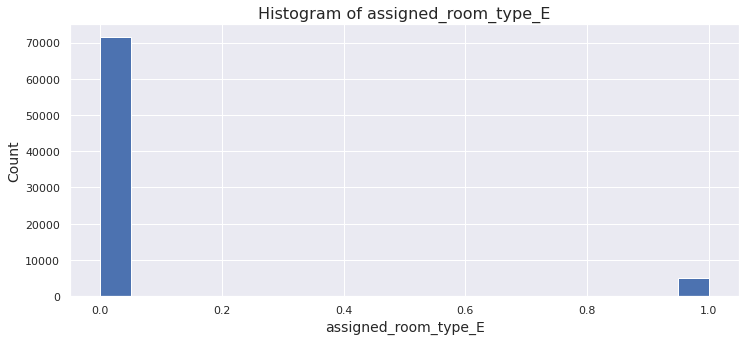

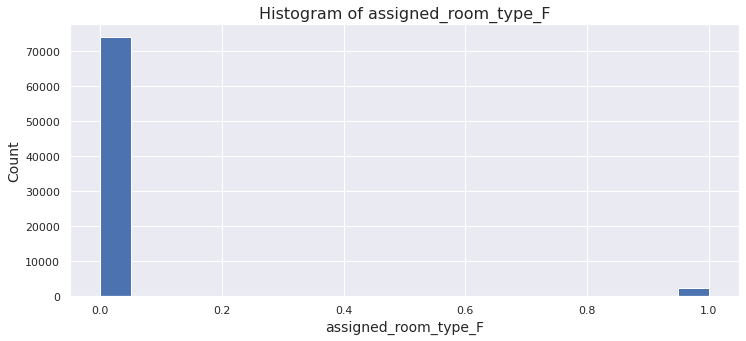

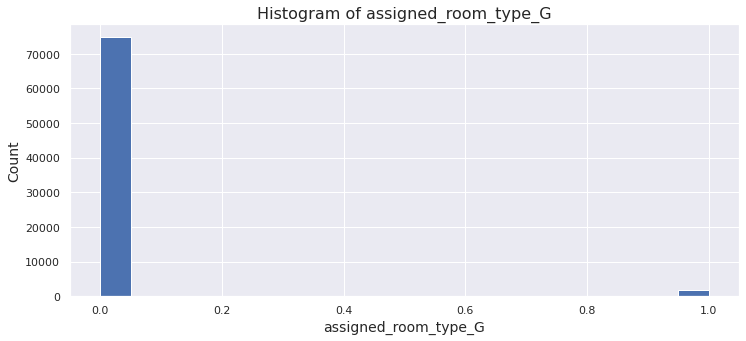

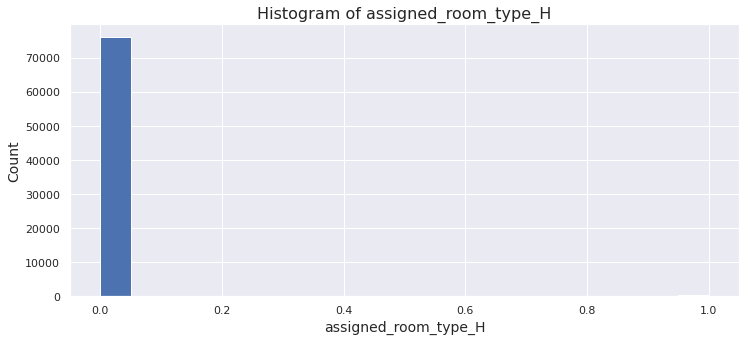

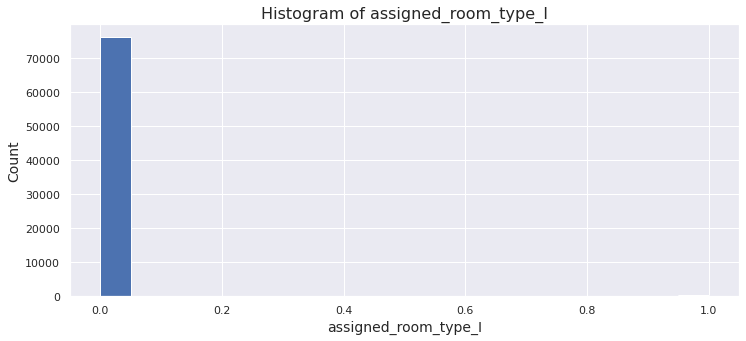

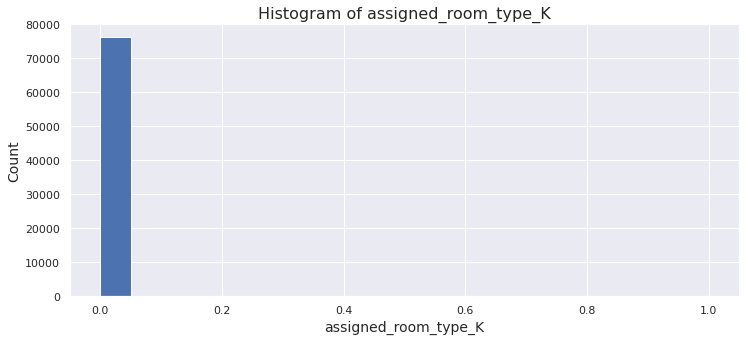

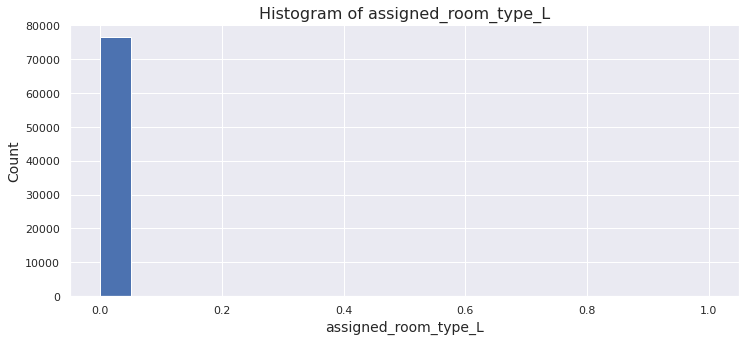

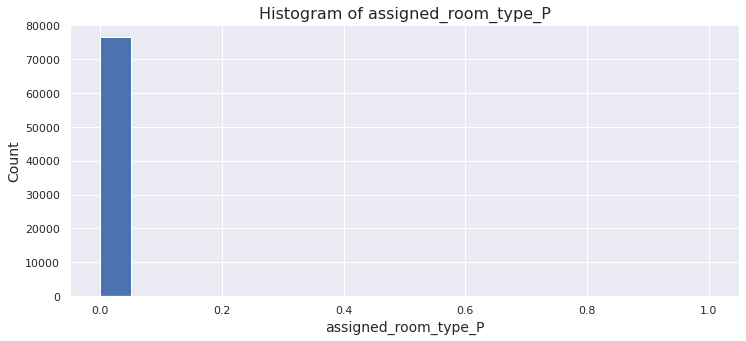

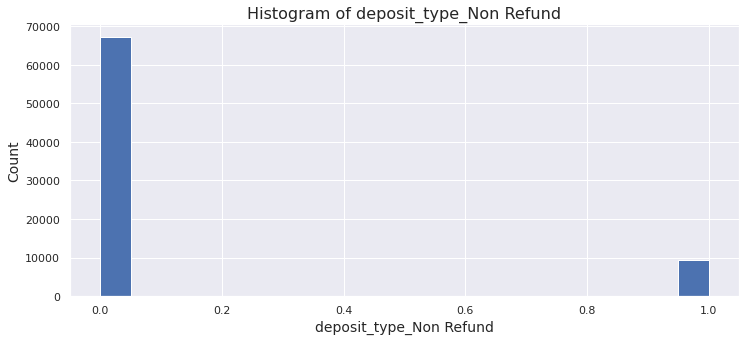

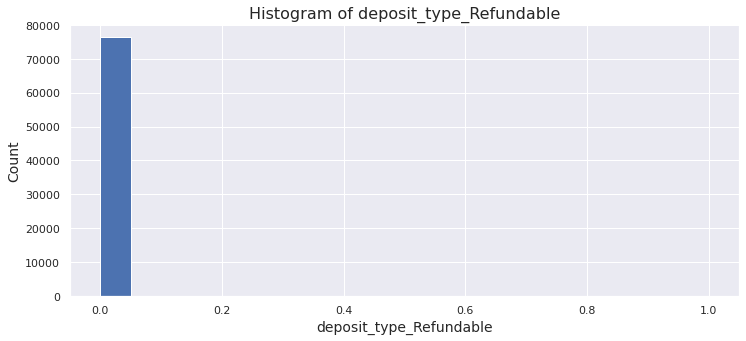

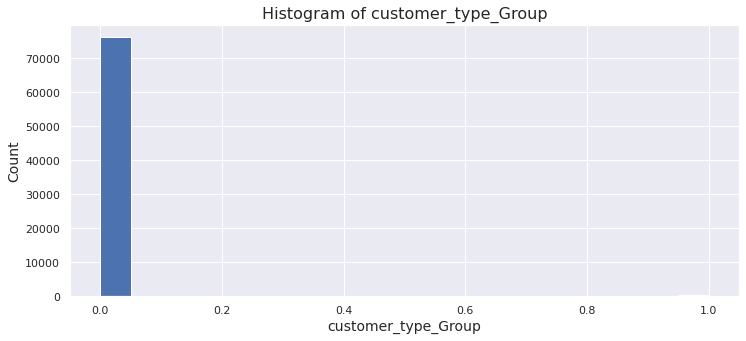

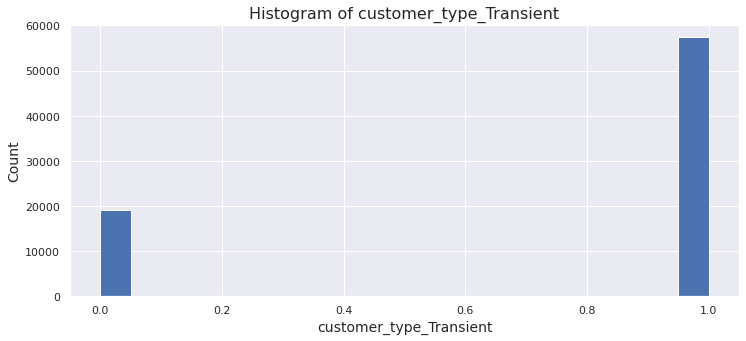

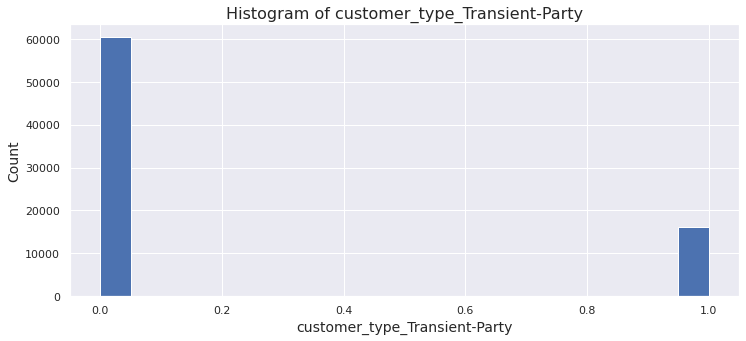

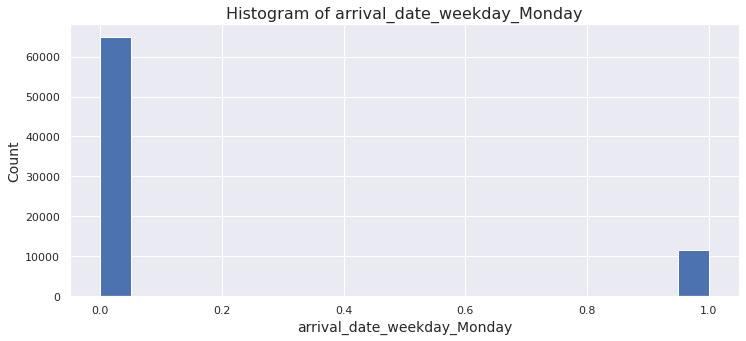

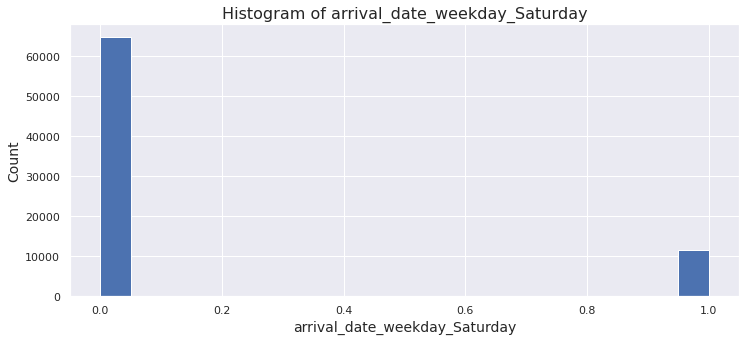

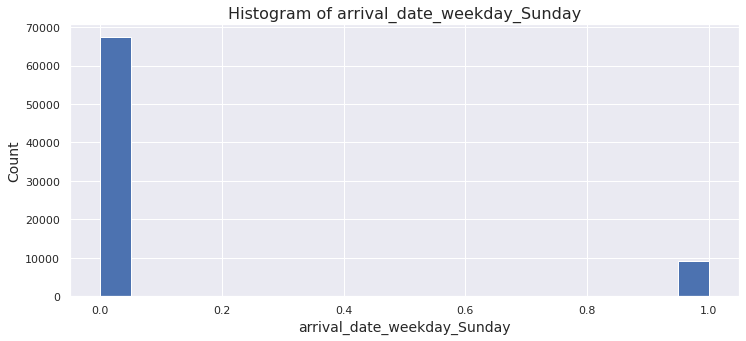

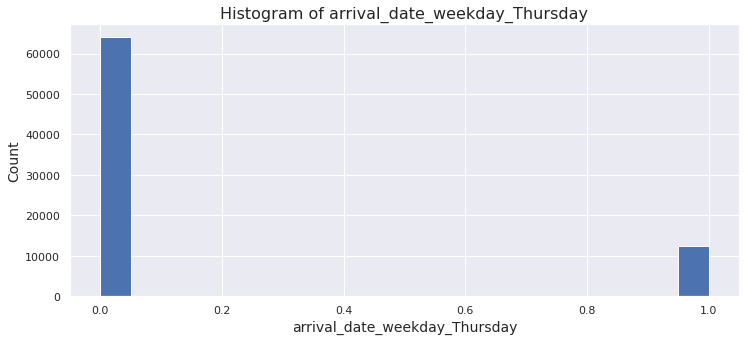

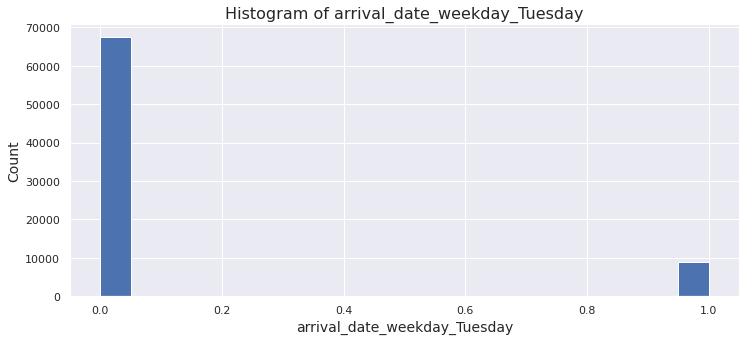

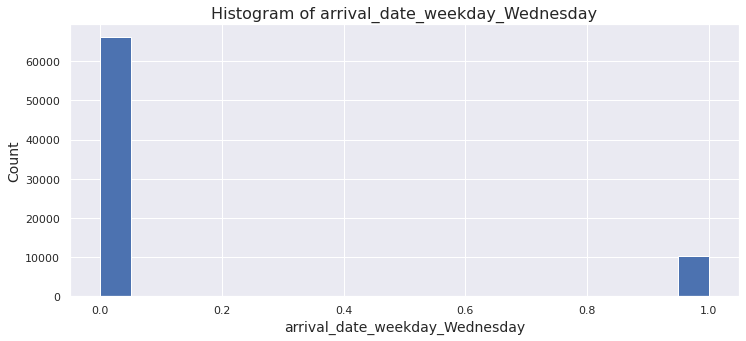

In [6]:
for column in df.columns[1:]:
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.set_title(f"Histogram of {column}", fontsize=16)
    ax.set_ylabel("Count", fontsize=14)
    ax.set_xlabel(column, fontsize=14)
    ax.hist(df_train[column], bins=20)
    plt.show()
    print("\n")

<hr>

Since there are a lot outliers, it is better to apply StandardScaler instead of MinMaxScaler

In [7]:
std_scaler = StandardScaler()

<hr>

Fit StandardScaler with X_train

In [8]:
X_train = df_train.drop("is_canceled", axis=1)

std_scaler.fit(X_train)

StandardScaler()

<hr>

Save StandardScaler, so it can be used further.

In [9]:
folder = os.path.join("..", "scalers")
filename = f"std_scaler_{datetime.now().strftime('%Y%m%d')}.pickle"
filepath = os.path.join(folder, filename)

if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(filepath, "wb") as f:
    pickle.dump(std_scaler, f)